# Plotting a Perceptron

## Introduction

In the last lesson we saw how we could represent a basic perceptron.  Our perceptron receives various inputs and then based on these inputs either fires or does not fire.

<img src="./neuron-general-2.png" width="50%">

As we can see in the diagram above, the perceptron returns a 1 or 0 depending on whether the weighted the sum of these inputs plus the bias is greater than 0.  

In this lesson, let's work on translating our perceptron into the context of plotting some data and then using the perceptron as our hypothesis function to make a prediction.

### Plotting the perceptron

Below let's take a look at some data of different food that either have sugar or not, along with their scores for sweet taste and sweet smell.  

As we can see from the plot below, the more that the food tastes sweet and smells sweet, the more that there tends to be sugar.

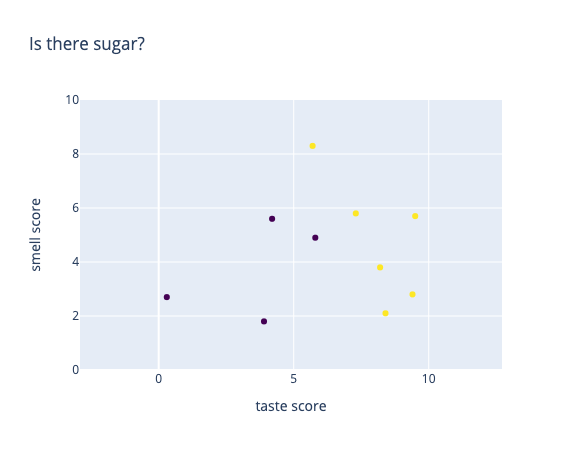

In [94]:
import plotly.graph_objects as go
sugar_data_json = "https://raw.githubusercontent.com/jigsawlabs-student/neural-nets-from-scratch/master/1-single-neurons/1-neuron-hypothesis-fn/1-hypothesis-fn/sugar_data_fig.json"
fig_dict = dict(pd.read_json(sugar_data_json, typ = 'dict'))
go.Figure(fig_dict)

Ok, now so far this is just a plot of our data.  Now let's plot the hypothesis function.

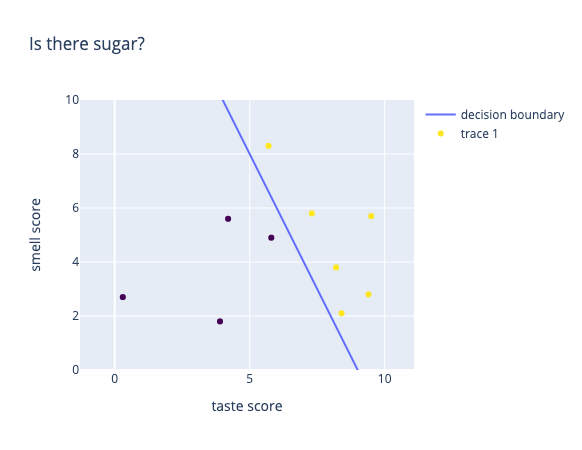

In [95]:
import plotly.graph_objects as go
json_file = "https://raw.githubusercontent.com/jigsawlabs-student/neural-nets-from-scratch/master/1-single-neurons/1-neuron-hypothesis-fn/1-hypothesis-fn/sugar_fig_hyp.json"
fig_dict = dict(pd.read_json(json_file, typ = 'dict'))
go.Figure(fig_dict)

This straight line is the graphed version of our hypothesis function.  If the data is to the right of the line, the perceptron predicts it has sugar, and on the other side of the line the perceptron predicts not.

Take another look at the formula.

\begin{equation}
  f(x)=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if}\ 2x_1 + 1x_2 - 18> 0 \\
    0, & \text{otherwise}
  \end{array}\right.
\end{equation} 

Now if you follow the blue line from the bottom of the plot to the top, you can see that the line contains the points `(9, 0)`, `(8, 2)`, `(7, 4)`.  These are all points where $2*x_1 + x_2 - 18 = 0$.  For example, for the first point:
* $2*9 + 1*0 - 18 = 0$

This line is called the decision boundary.  On the right side of the decision boundary we make one prediction (above 1), and on the other side we predict a different value (above 0).

### Practice with Perceptrons

Now let's use a perceptron to make predictions with our breast cancer cell dataset.

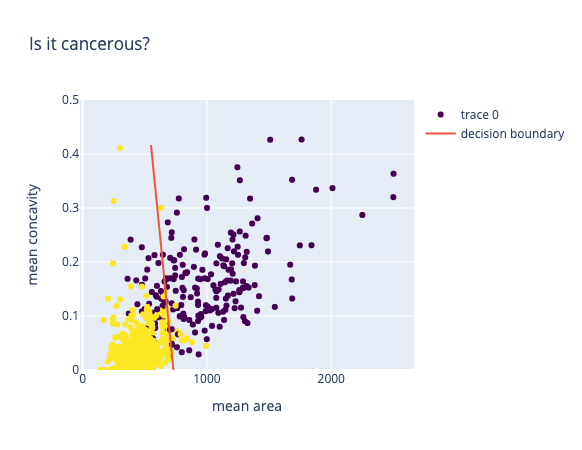

In [96]:
import plotly.graph_objects as go
cancer_json = "https://raw.githubusercontent.com/jigsawlabs-student/neural-nets-from-scratch/master/1-single-neurons/1-neuron-hypothesis-fn/1-hypothesis-fn/cancer_logistic.json"
fig_dict = dict(pd.read_json(cancer_json, typ = 'dict'))
go.Figure(fig_dict)

The line above represents the hypothesis function of the perceptron.  And the line above repesents the following hypothesis function of the perceptron:

\begin{equation}
  f(x)=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if}\ -.0080233*x_1 + -3.47361781*x_2 + 5.86 > 0 \\
    0, & \text{otherwise}
  \end{array}\right.
\end{equation} 

In [19]:
def perceptron(x_1, x_2):
    summation = -0.00802333*x_1 +  -3.47361781*x_2 + 5.86
    if summation > 0:
        return 1
    else:
        return 0

> Press `shift + return` on the cell above to declare your function. The answer for this is below.

In [20]:
x_1 = 951.6
x_2 = .1036
perceptron(x_1, x_2)
# 0

0

In [22]:
x_1 = 435.6
x_2 = .059
perceptron(x_1, x_2)
# 1

1

### This time, with confidence

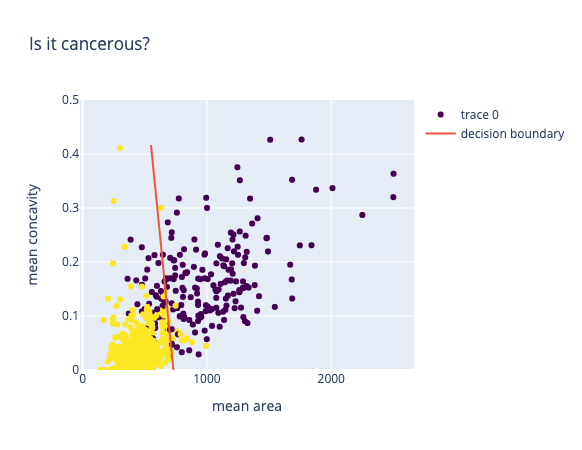

In [97]:
import plotly.graph_objects as go
cancer_json = "https://raw.githubusercontent.com/jigsawlabs-student/neural-nets-from-scratch/master/1-single-neurons/1-neuron-hypothesis-fn/1-hypothesis-fn/cancer_logistic.json"
fig_dict = dict(pd.read_json(cancer_json, typ = 'dict'))
go.Figure(fig_dict)

Remember that we predict everything to the right of the line  0, and everything to the left to be a 1.  Now, looking at the graph above, we should be more confident about predicting observations that are further away from our decision boundary than closer to it.  After all, it is only close to the decision boundary that we see our errors.

Now notice what happens if instead of predicting an all or nothing 1 or 0, we update our graph to use the weighted sums.

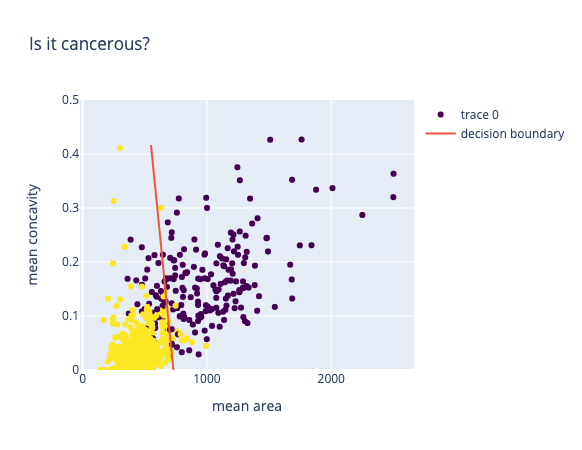

In [98]:
weighted_sums_json = "https://raw.githubusercontent.com/jigsawlabs-student/neural-nets-from-scratch/master/1-single-neurons/1-neuron-hypothesis-fn/1-hypothesis-fn/weighted_sum_cancer.json"
weighted_dict = dict(pd.read_json(weighted_sums_json, typ = 'dict'))
go.Figure(weighted_dict)

So now our values reflect the distance from the decision boundary.  The further the marker is from the line, the greater the value, which makes sense as we are more confident in the prediction.  And now a negative value represents a prediction of no cancer (previously 0), and a positive value is a prediction of presence.

We can update this in our code, by going from our perceptron returning a 1 or a 0 as in the function below:

In [99]:
def perceptron(x_1, x_2):
    summation = -0.00802333*x_1 +  -3.47361781*x_2 + 5.86
    if summation > 0:
        return 1
    else:
        return 0

In [100]:
perceptron(1191, .1655)

0

To returning the weighted sum itself:

In [101]:
def perceptron(x_1, x_2):
    weighted_sum = -0.00802333*x_1 +  -3.47361781*x_2 + 5.86
    return weighted_sum

So now let's use the perceptron to make two predictions.

In [106]:
perceptron(1191, .1655)

-4.270669777555001

In [111]:
perceptron(800, .01)

-0.5934001781000005

So now each return value gives us two pieces of information: both the prediction and the confidence in the prediction.  So for example, above, for both observations we predict the absence of cancer, but we are less confident with predicting the second observation than with the first (as -4.27 is further from 0 than -.593).

### Summary

In this lesson, we saw how we can plot the decision boundary of a perceptron.  The decision boundary is the line the divides predictions in one class versus the other.  It corresponds to where our `summation`, or linear component, is exactly zero. And then we predict an observation depending on if it lines on one side of the decision boundary or the other -- that is if the summation is greater or less than zero.

We then saw that we can express a degree of confidence in the prediction by changing our hypothesis function to return the weighted sum itself.  With that change, our hypothesis function can now return any number, from positive infinity to negative infinity.  The negative values correspond to one prediction, and the positive predictions another.  And then the further the weighted sum is from zero the more confident we are in each prediction.  

For example above, a return value of `1` means we are more confident in the presence of cancer than with return value of `.1`.  And a return value of `-1` means that we are more confident in the absence of cancer than a return value of `-.1`.

### Answers

In [ ]:
def perceptron(x_1, x_2):
    summation = -0.00802333*x_1 +  -3.47361781*x_2 + 5.86
    if summation > 0:
        return 1
    else:
        return 0